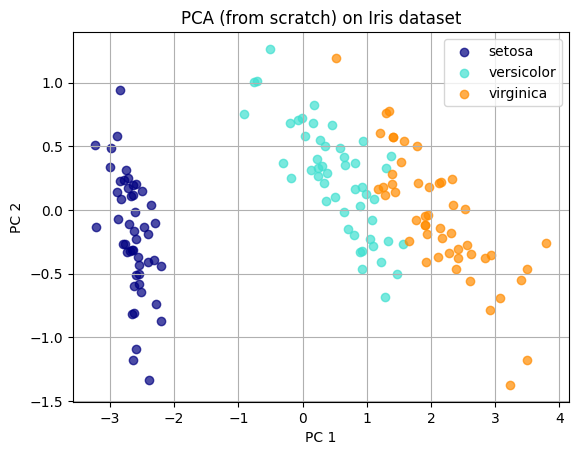

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data  # (150, 4)
y = iris.target
target_names = iris.target_names

# Standardize the data (zero mean)
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Compute covariance matrix
cov_matrix = np.cov(X_centered.T)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues (descending)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvalues = eigenvalues[sorted_indices]

# Project data onto first 2 principal components
W = eigenvectors[:, :2]
X_pca = X_centered @ W

# Plot
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
for i, color, label in zip([0, 1, 2], colors, target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=label, color=color, alpha=0.7)
plt.title("PCA  on Iris dataset")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()
